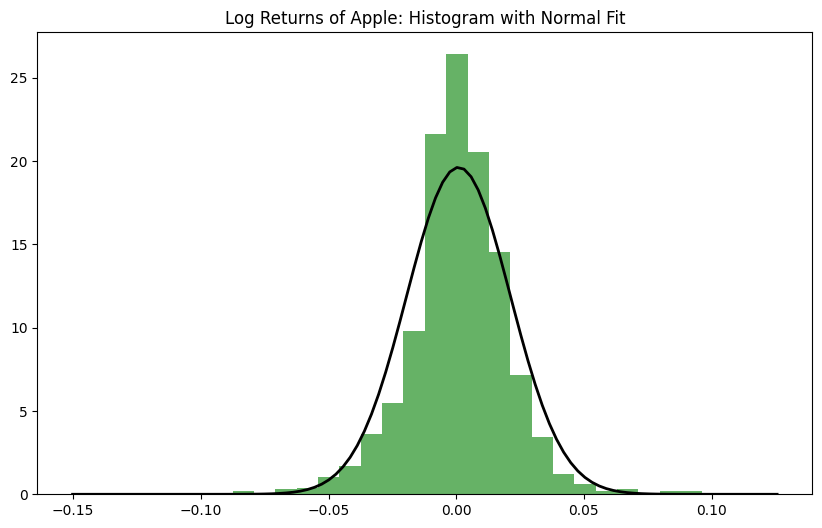

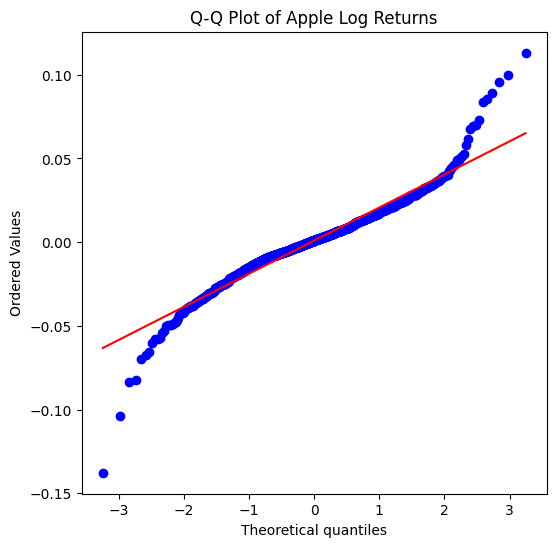

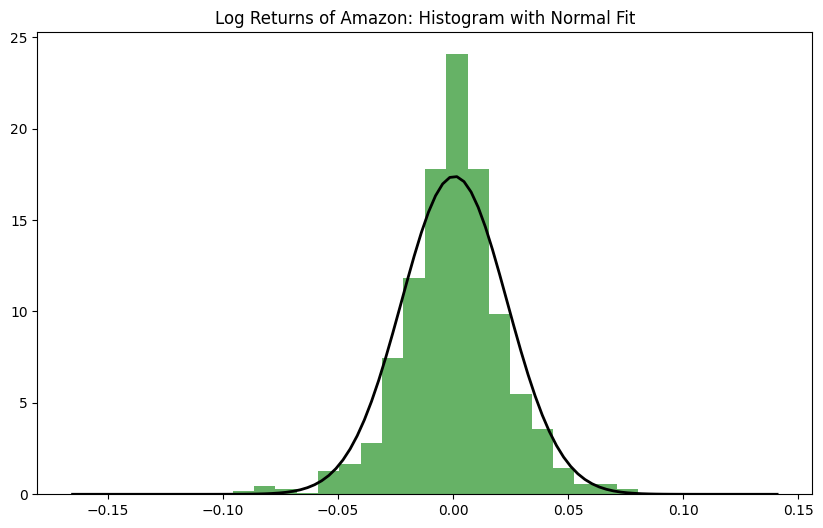

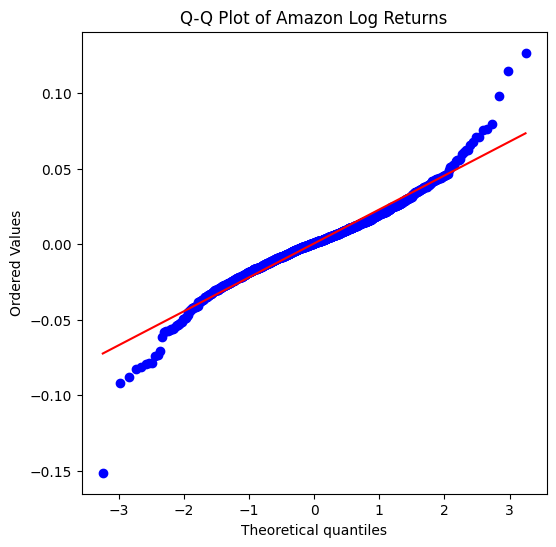

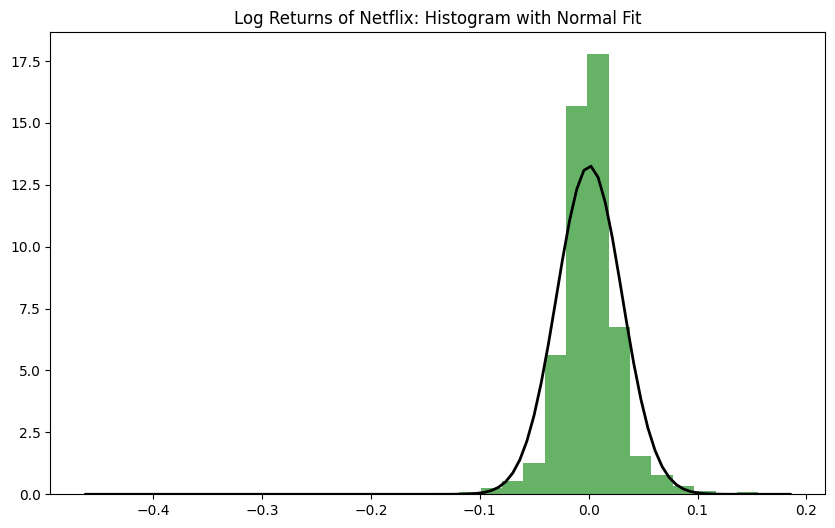

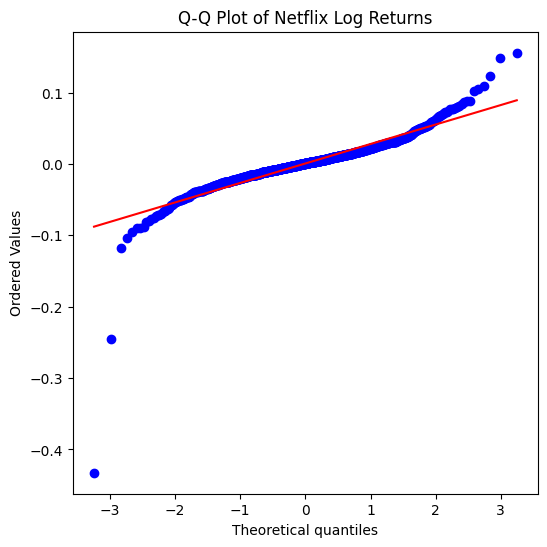

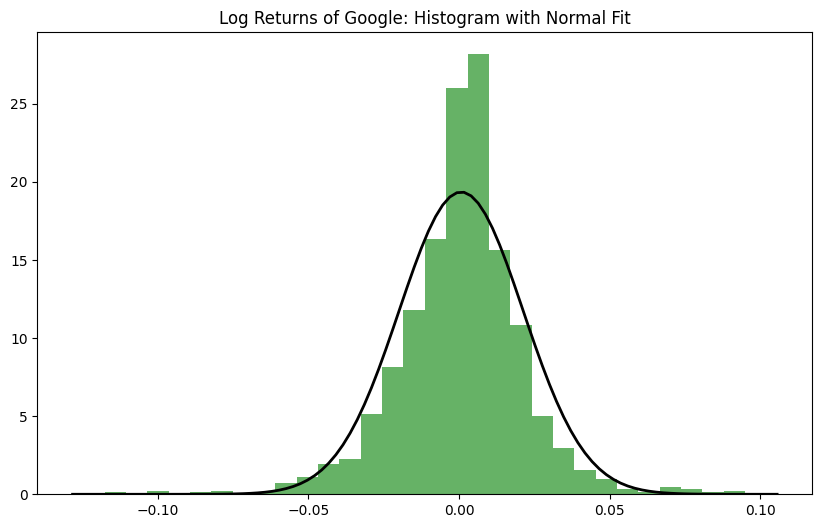

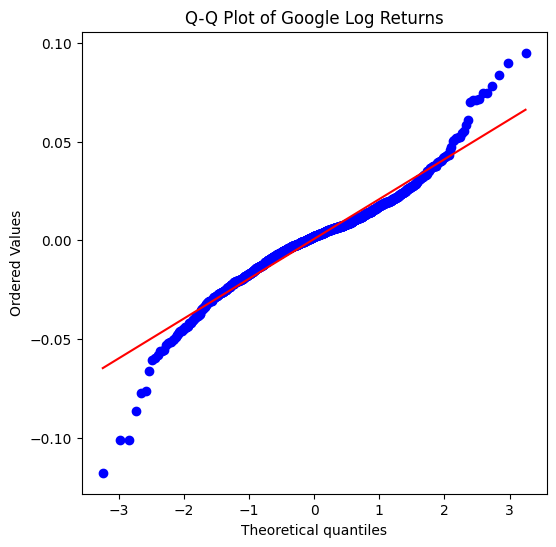

In [2]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Folder path where the JSON files are saved
folder_path = 'fetch'
arrf = ["Apple", "Amazon", "Netflix", "Google"]

# Load and prepare the data
data_frames = {}
for name in arrf:
    file_path = os.path.join(folder_path, f'{name}_stock.json')
    with open(file_path, 'r') as file:
        data = json.load(file)
    df = pd.DataFrame(data['results'])
    df['t'] = pd.to_datetime(df['t'], unit='ms')
    df.set_index('t', inplace=True)
    df['log_returns'] = np.log(df['c'] / df['c'].shift(1))  # Calculate log returns
    data_frames[name] = df.dropna()

# Visual Inspection: Histogram and Q-Q plot for each stock
for name, df in data_frames.items():
    log_returns = df['log_returns']

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(log_returns, bins=30, density=True, alpha=0.6, color='g')
    mu, std = stats.norm.fit(log_returns)  # Fit a normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Log Returns of {name}: Histogram with Normal Fit')
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(6, 6))
    stats.probplot(log_returns, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {name} Log Returns')
    plt.show()


In [3]:
# Perform the Kolmogorov-Smirnov test for each stock
for name, df in data_frames.items():
    log_returns = df['log_returns'].dropna()
    
    # Fit a normal distribution
    mu, std = stats.norm.fit(log_returns)
    
    # Perform K-S test
    ks_stat, p_value = stats.kstest(log_returns, 'norm', args=(mu, std))
    
    print(f'K-S Test for {name}:')
    print(f'KS Statistic: {ks_stat:.4f}')
    print(f'P-Value: {p_value:.4f}\n')


K-S Test for Apple:
KS Statistic: 0.0729
P-Value: 0.0000

K-S Test for Amazon:
KS Statistic: 0.0529
P-Value: 0.0026

K-S Test for Netflix:
KS Statistic: 0.0908
P-Value: 0.0000

K-S Test for Google:
KS Statistic: 0.0678
P-Value: 0.0000

